# Financial Inclusion in Africa Starter Notebook


In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load files into a pandas dataframe
train = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/Train.csv')
test = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/Test.csv')
ss = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/SampleSubmission.csv')
variables = pd.read_csv('/Users/lenastrokov/neuefische/ML_project_2/data/SampleSubmission.csv')

In [3]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [4]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train["index"]= train.index

In [6]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,index
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,3
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,4


In [7]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
index                     0
dtype: int64


We don't have missing data in our dataset.



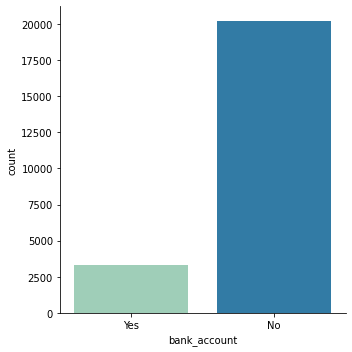

In [8]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train,  palette="YlGnBu")


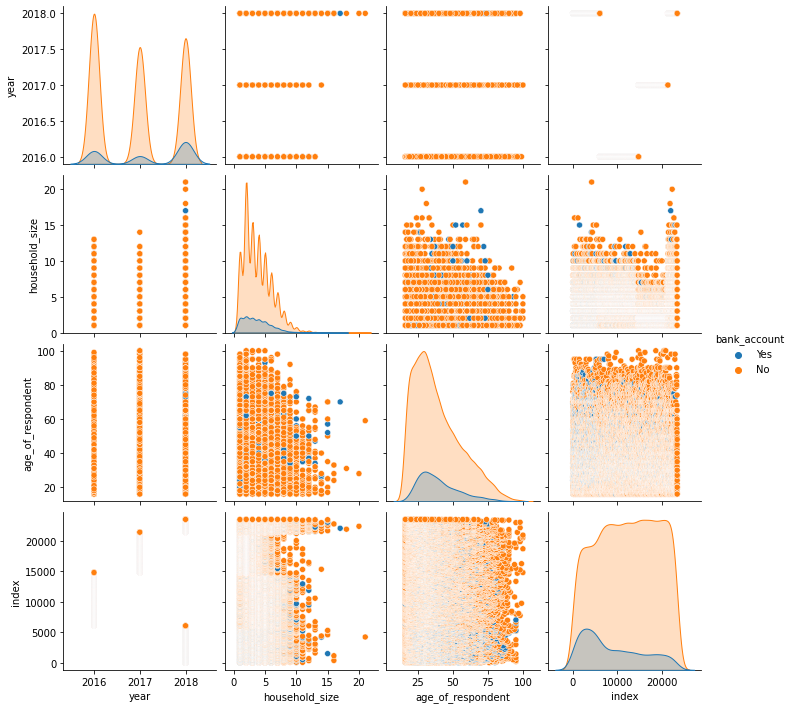

In [9]:
sns.pairplot(train, hue='bank_account')

In [10]:
train.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

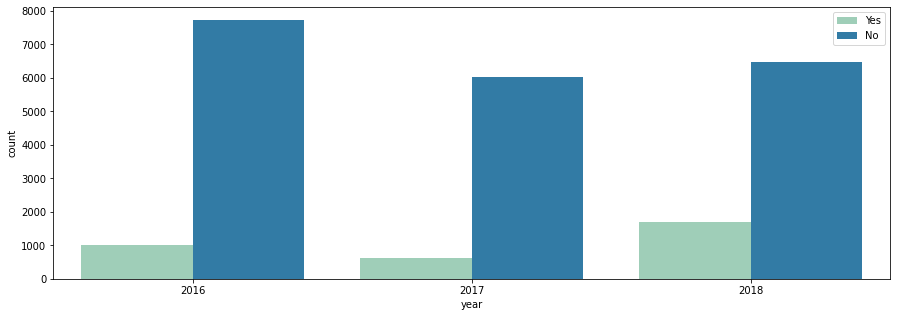

In [12]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='year',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0)
plt.legend(
    loc='best')

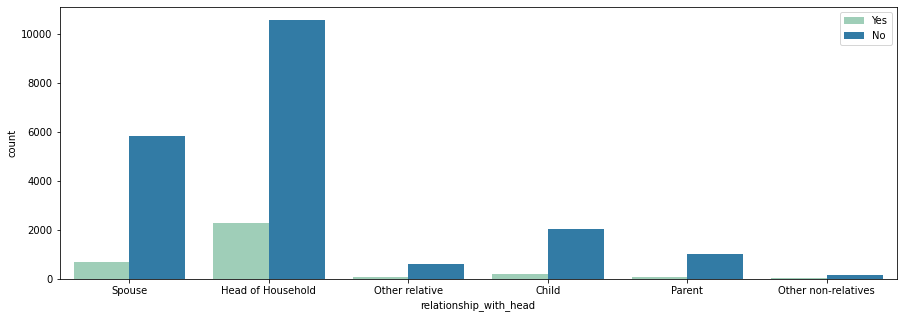

In [14]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='relationship_with_head',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0)
plt.legend(
    loc='best')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

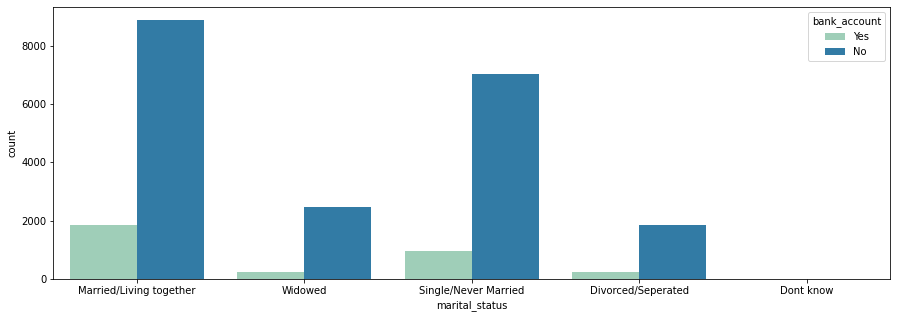

In [15]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='marital_status',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0)

    

In [17]:
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

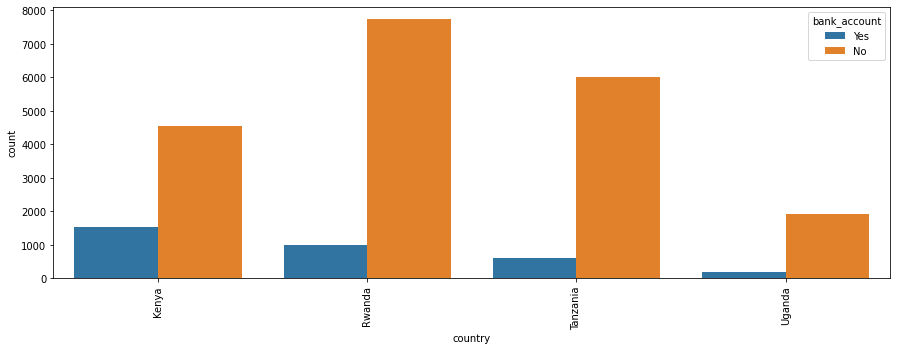

In [18]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='country',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [19]:
train.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [20]:
train.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

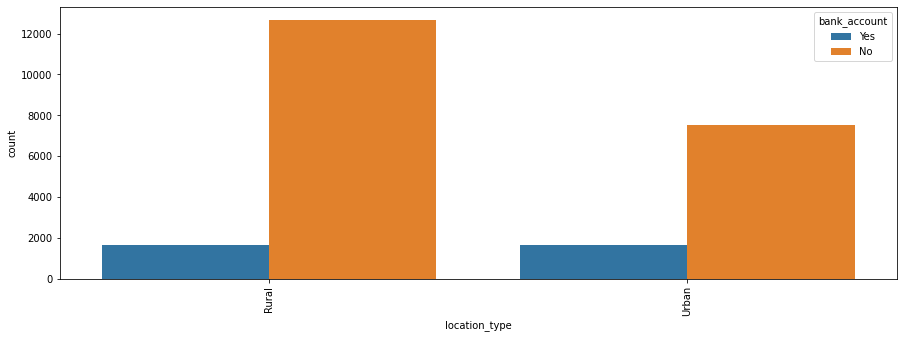

In [21]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='location_type',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [22]:
train.gender_of_respondent.value_counts()


Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

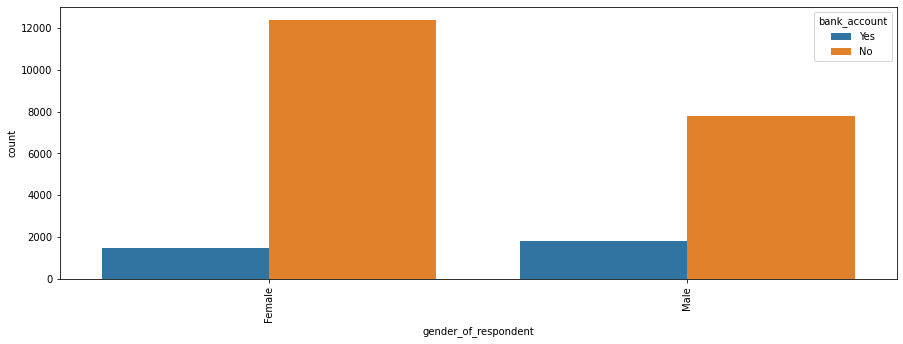

In [23]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='gender_of_respondent',data=train ,hue='bank_account')
plt.xticks(rotation=90);

In [24]:
train.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

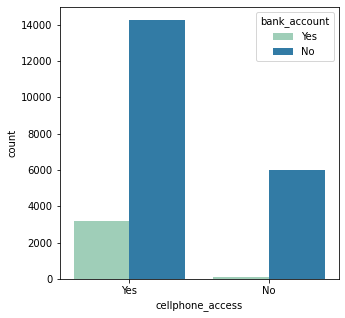

In [25]:
plt.figure(figsize=(5,5))
fig = sns.countplot(x='cellphone_access',data=train ,hue='bank_account', palette="YlGnBu")
plt.xticks(rotation=0);

In [26]:
train.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

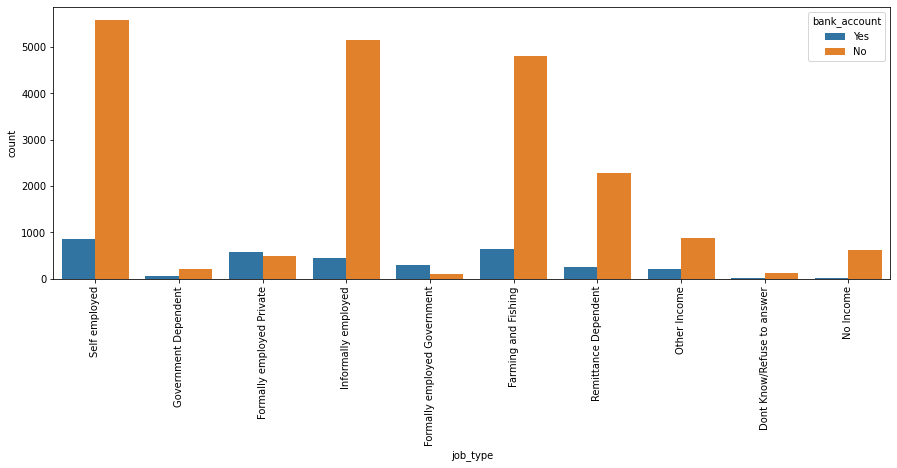

In [27]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='job_type',data=train,hue='bank_account')
plt.xticks(rotation=90);


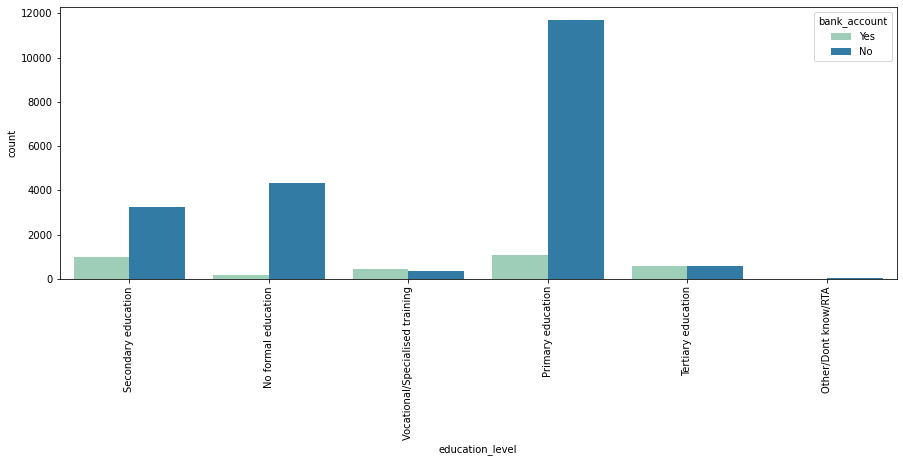

In [28]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='education_level',data=train,hue='bank_account', palette="YlGnBu" )
plt.xticks(rotation=90);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


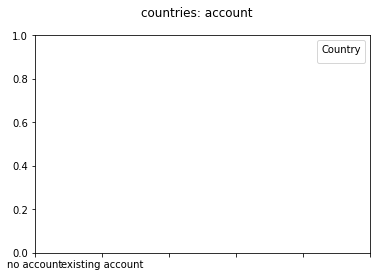

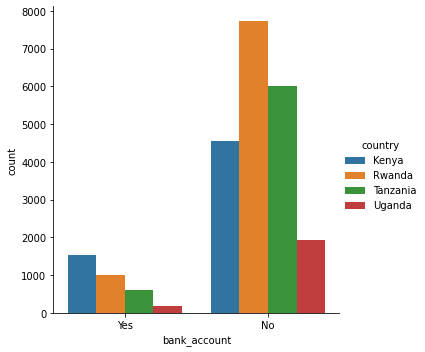

In [30]:
fig, ax = plt.subplots()

sns.catplot("bank_account", hue="country", data=train, kind="count",ax=ax)
          


ax.legend(title="Country")
ax.set_xticklabels(["no account", "existing account"])
ax.set_xlabel("")

fig.suptitle("countries: account");

nach geschlecht

In [31]:
# Create a dataframe with the counts by job type and user/non user
gender_counts_df = train.groupby(["gender_of_respondent", "bank_account"])["index"].count().unstack()
gender_counts_df

bank_account,No,Yes
gender_of_respondent,,
Female,12395,1482
Male,7817,1830


In [32]:
gender_user_percents_df = gender_counts_df.T.div(gender_counts_df.T.sum()).T
gender_user_percents_df

bank_account,No,Yes
gender_of_respondent,,
Female,0.893205,0.106795
Male,0.810304,0.189696


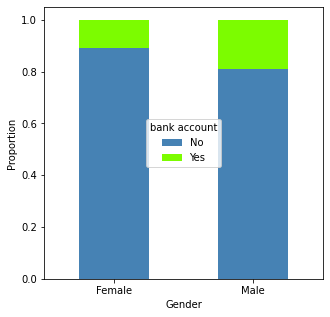

In [33]:
fig, ax = plt.subplots()
#plt.figure(figsize=(5,5))

gender_user_percents_df.plot(kind="bar", stacked=True, color=["steelblue", "lawngreen"],figsize=(5,5), ax=ax)

ax.set_xlabel("Gender")
ax.set_xticklabels(["Female", "Male"], rotation=0)
ax.set_ylabel("Proportion")

ax.legend(title="bank account",loc='center')

#fig.suptitle("gender")

nach job groups

In [34]:
# Create a dataframe with the counts by job type and user/non user
job_counts_df = train.groupby(["job_type", "bank_account"])["index"].count().unstack()
job_counts_df

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,112,14
Farming and Fishing,4806,635
Formally employed Government,87,300
Formally employed Private,484,571
Government Dependent,197,50
Informally employed,5152,445
No Income,614,13
Other Income,884,196
Remittance Dependent,2287,240


In [35]:
# Use the same counts df, adding up to 1
job_user_percents_df = job_counts_df.T.div(job_counts_df.T.sum()).T
job_user_percents_df

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,0.888889,0.111111
Farming and Fishing,0.883294,0.116706
Formally employed Government,0.224806,0.775194
Formally employed Private,0.458768,0.541232
Government Dependent,0.797571,0.202429
Informally employed,0.920493,0.079507
No Income,0.979266,0.020734
Other Income,0.818519,0.181481
Remittance Dependent,0.905026,0.094974


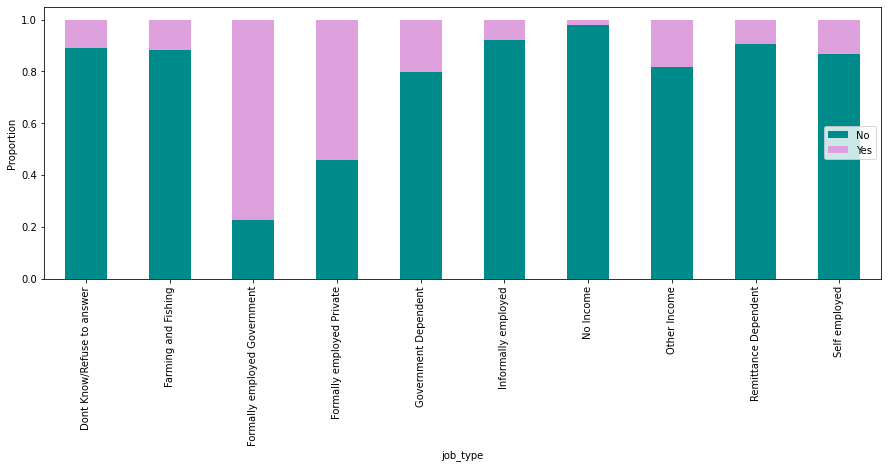

In [36]:
fig, ax = plt.subplots()

job_user_percents_df.plot(kind="bar", stacked=True, color=["darkcyan", "plum"], figsize=(15,5), ax=ax)

ax.set_xlabel("job_type")
ax.set_xticklabels(["Dont Know/Refuse to answer", "Farming and Fishing", "Formally employed Government",	
    "Formally employed Private", "Government Dependent", "Informally employed", "No Income", "Other Income",
    "Remittance Dependent", "Self employed"], rotation=90)
ax.set_ylabel("Proportion")

ax.legend(loc='center right')

#fig.suptitle("Job Types vs. bank account user/non user ");

nach countries

In [37]:
# Create a dataframe with the counts by job titel und bank account
counts_df = train.groupby(["country", "bank_account"])["index"].count().unstack()
counts_df

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


In [38]:
country_percents_df = counts_df.div(counts_df.sum()).T
country_percents_df

country,Kenya,Rwanda,Tanzania,Uganda
bank_account,,,,
No,0.224965,0.382545,0.297497,0.094993
Yes,0.459239,0.302838,0.183273,0.054650


In [39]:
# Use the same counts df, but now survived + did not survive add up to 1
user_percents_df = counts_df.T.div(counts_df.T.sum()).T
user_percents_df


bank_account,No,Yes
country,,
Kenya,0.749341,0.250659
Rwanda,0.885175,0.114825
Tanzania,0.908308,0.091692
Uganda,0.913851,0.086149


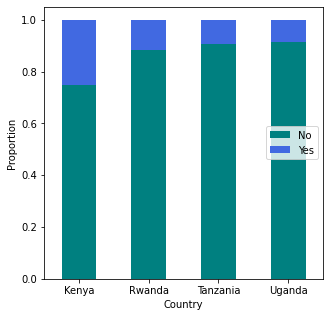

In [40]:
fig, ax = plt.subplots()

user_percents_df.plot(kind="bar", stacked=True, color=["teal", "royalblue"],figsize=(5,5), ax=ax)

ax.set_xlabel("Country")
ax.set_xticklabels(["Kenya", "Rwanda",	"Tanzania",	"Uganda"], rotation=0)
ax.set_ylabel("Proportion")

#color_patches = [
   # Patch(facecolor="blue", label="user"),
   # Patch(facecolor="green", label="non user")
#]
ax.legend(#handles=color_patches,
    loc='center right')

#fig.suptitle("Countries vs. bank account user ");

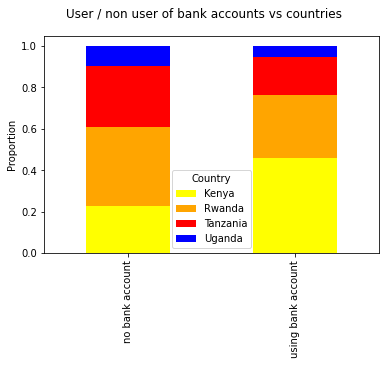

In [41]:
fig, ax = plt.subplots()

country_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "blue"], ax=ax)

ax.legend(title="Country")
ax.set_xticklabels(["no bank account", "using bank account"], rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("User / non user of bank accounts vs countries ");

nach education level

In [42]:
# Create a dataframe with the counts by education level und bank account
edu_counts_df = train.groupby(["education_level", "bank_account"])["index"].count().unstack()
edu_counts_df

bank_account,No,Yes
education_level,,
No formal education,4339,176
Other/Dont know/RTA,24,11
Primary education,11698,1093
Secondary education,3240,983
Tertiary education,566,591
Vocational/Specialised training,345,458


In [43]:
edu_percents_df = edu_counts_df.div(edu_counts_df.sum()).T
edu_percents_df

education_level,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
bank_account,,,,,,
No,0.214674,0.001187,0.578765,0.160301,0.028003,0.017069
Yes,0.053140,0.003321,0.330012,0.296800,0.178442,0.138285


Text(0, 0.5, 'Proportion')

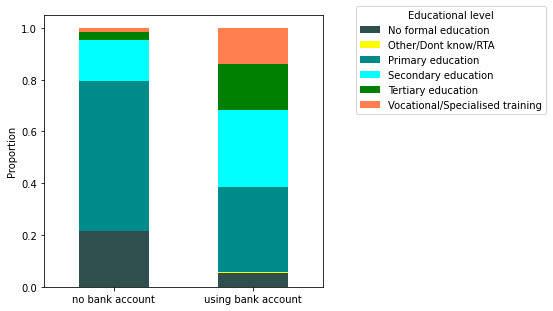

In [44]:
fig, ax = plt.subplots()

edu_percents_df.plot(kind="bar", stacked=True, color=["darkslategrey", "yellow", "darkcyan", "aqua", "green", "coral"],figsize=(5,5), ax=ax)


ax.legend(bbox_to_anchor=(1.1, 1.05), title="Educational level")
ax.set_xticklabels(["no bank account", "using bank account"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

#fig.suptitle("User/non user of bank accounts vs educational level ");

# Random forest modelling

In [45]:
df= train.copy()
RSEED = 50

In [46]:

df = df.rename(columns = {'bank_account': 'label'})
df['label'].value_counts()

No     20212
Yes     3312
Name: label, dtype: int64

In [47]:
df=df.drop("index",axis=1)

In [48]:
df.head()

,country,year,uniqueid,label,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [49]:
df=df.drop(["year","uniqueid"],axis=1)

In [50]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   label                   23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB
None


In [51]:
df['country'] = df['country'].astype('category')
df['location_type'] = df['location_type'].astype('category')
df['cellphone_access'] = df['cellphone_access'].astype('category')
df['relationship_with_head'] = df['relationship_with_head'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['education_level'] = df['education_level'].astype('category')
df['job_type'] = df['job_type'].astype('category')
df['gender_of_respondent'] = df['gender_of_respondent'].astype('category')
df['label'] = df['label'].astype('category')

In [52]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 23524 non-null  category
 1   label                   23524 non-null  category
 2   location_type           23524 non-null  category
 3   cellphone_access        23524 non-null  category
 4   household_size          23524 non-null  int64   
 5   age_of_respondent       23524 non-null  int64   
 6   gender_of_respondent    23524 non-null  category
 7   relationship_with_head  23524 non-null  category
 8   marital_status          23524 non-null  category
 9   education_level         23524 non-null  category
 10  job_type                23524 non-null  category
dtypes: category(9), int64(2)
memory usage: 576.1 KB
None


In [ ]:
# Extract the labels
labels = np.array(df.pop('label'))

In [117]:


# 30% examples in test data
X_train, X_test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [119]:
X_train


,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23110,Uganda,Rural,Yes,2,28,Male,Head of Household,Married/Living together,Primary education,Self employed
1376,Kenya,Urban,Yes,2,28,Female,Head of Household,Divorced/Seperated,Primary education,Self employed
13207,Rwanda,Urban,Yes,7,19,Male,Child,Single/Never Married,Secondary education,Formally employed Government
21630,Uganda,Rural,Yes,2,27,Female,Head of Household,Married/Living together,Secondary education,Self employed
3300,Kenya,Rural,Yes,6,45,Female,Child,Widowed,Vocational/Specialised training,Informally employed
...,...,...,...,...,...,...,...,...,...,...
2747,Kenya,Rural,Yes,5,20,Male,Child,Single/Never Married,Secondary education,Formally employed Private
10115,Rwanda,Rural,Yes,3,67,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
12356,Rwanda,Urban,Yes,1,44,Male,Head of Household,Single/Never Married,Primary education,Informally employed
1947,Kenya,Rural,Yes,7,25,Female,Spouse,Married/Living together,No formal education,Informally employed


In [120]:
cat_predictor = list(X_train.columns)
cat_predictor.remove("household_size")
cat_predictor.remove("age_of_respondent")
print(cat_predictor)

['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [121]:
for predictor in cat_predictor:
    X_train[(predictor)] = le.fit_transform(X_train[(predictor)])
    X_test[(predictor)] = le.transform(X_test[(predictor)])


In [122]:
X_train

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23110,3,0,1,2,28,1,1,2,2,9
1376,0,1,1,2,28,0,1,0,2,9
13207,1,1,1,7,19,1,0,3,3,2
21630,3,0,1,2,27,0,1,2,3,9
3300,0,0,1,6,45,0,0,4,5,5
...,...,...,...,...,...,...,...,...,...,...
2747,0,0,1,5,20,1,0,3,3,3
10115,1,0,1,3,67,1,1,2,0,1
12356,1,1,1,1,44,1,1,3,2,5
1947,0,0,1,7,25,0,5,2,0,5


In [123]:
X_test

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
20431,2,1,1,1,28,0,1,0,2,9
7585,1,1,1,2,29,1,1,3,4,5
11859,1,0,1,8,45,1,1,2,2,4
2463,0,1,1,1,30,0,1,0,3,5
1466,0,0,0,5,27,0,0,3,5,3
...,...,...,...,...,...,...,...,...,...,...
608,0,0,1,5,47,1,1,2,2,5
17905,2,1,1,4,38,1,1,3,0,9
16280,2,1,1,2,38,1,1,3,2,9
8182,1,0,1,5,25,1,0,2,2,1


In [124]:
features = list(train.columns)
features

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'index']

In [125]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [126]:
prediction_forest = model.predict(X_test) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [127]:
from sklearn.metrics import classification_report, confusion_matrix


In [128]:
print(classification_report(test_labels, prediction_forest))

              precision    recall  f1-score   support

          No       0.90      0.95      0.92      6064
         Yes       0.54      0.38      0.44       994

    accuracy                           0.87      7058
   macro avg       0.72      0.66      0.68      7058
weighted avg       0.85      0.87      0.86      7058



In [129]:
import numpy as np
import itertools

In [130]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[5745  319]
 [ 621  373]]


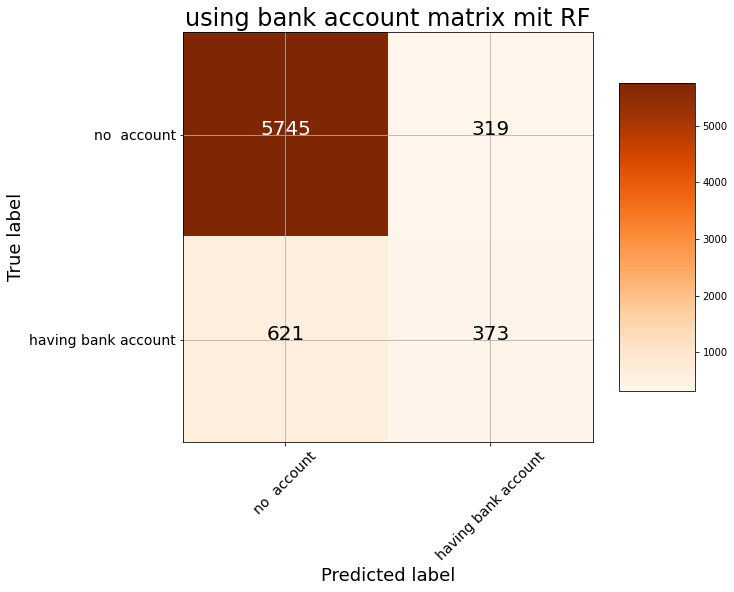

In [131]:
cm = confusion_matrix(test_labels, prediction_forest)
plot_confusion_matrix(cm, classes = ['no  account','having bank account'],title = 'using bank account matrix mit RF')

In [132]:
#train_labels
le_train_labels = le.fit_transform(train_labels)
le_train_labels

array([0, 1, 0, ..., 0, 0, 0])

In [139]:
le_test_labels = le.transform(test_labels)
le_test_labels

array([0, 1, 0, ..., 0, 0, 1])

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'recall', cv = 3, 
                        n_iter = 10, verbose = 5, random_state=RSEED)

# Fit 
rs.fit(X_train, le_train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=28, min_samples_split=10, n_estimators=87;, score=0.228 total time=   0.5s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=28, min_samples_split=10, n_estimators=87;, score=0.259 total time=   0.9s
[CV 2/3] END bootstrap=False, max_depth=10, max_features=auto, max_leaf_nodes=28, min_samples_split=10, n_estimators=87;, score=0.232 total time=   1.0s
[CV 2/3] END bootstrap=True, max_depth=12, max_features=0.7999999999999999, max_leaf_nodes=33, min_samples_split=2, n_estimators=188;, score=0.292 total time=   2.4s
[CV 1/3] END bootstrap=False, max_depth=7, max_features=0.7, max_leaf_nodes=26, min_samples_split=10, n_estimators=153;, score=0.260 total time=   2.4s
[CV 1/3] END bootstrap=True, max_depth=12, max_features=0.7999999999999999, max_leaf_nodes=33, min_samples_split=2, n_estimators=188;, score=0.295 total time=   2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=50),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [146]:
rs.best_params_

{'n_estimators': 184,
 'min_samples_split': 2,
 'max_leaf_nodes': 40,
 'max_features': 0.7999999999999999,
 'max_depth': 14,
 'bootstrap': False}

In [147]:
rf_best_model = rs.best_estimator_

In [148]:
train_rf_predictions = rf_best_model.predict(X_train)
train_rf_probs = rf_best_model.predict_proba(X_train)[:, 1]

rf_predictions = rf_best_model.predict(X_test)
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]

In [149]:
print(classification_report(le_test_labels,rf_predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6064
           1       0.72      0.30      0.42       994

    accuracy                           0.88      7058
   macro avg       0.81      0.64      0.68      7058
weighted avg       0.87      0.88      0.86      7058



Only 10% of the train dataset will be used for evaluating the models. The parameter stratify = y_train will ensure an equal balance of values from both classes (‘yes’ and ‘no’) for both train and validation set.

There are many models to choose from such as 

*   [K Nearest Neighbors](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
*   [Logistic Regression](https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)
*   [Random Forest](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

We will be using [**XGBoost**](https://www.datacamp.com/community/tutorials/xgboost-in-python). 

We will start by training these models using the train set after splitting our train dataset.

In [ ]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

The evaluation metric for this challenge will be the percentage of survey respondents for whom you predict the binary 'bank account' classification incorrectly.

This means the **lower** the incorrect percentage we get, the better the model performance.

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Let’s check the confusion matrix for XGB model.

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

Our XGBoost model performs well on predicting **class 0** and performs poorly on predicting **class 1**, it may be caused by the imbalance of data provided(the target variable has more ‘No’ values than ‘Yes’ values). You can learn the best way to deal with imbalanced data here.

One way to increase the model performance is by applying the Grid search method as an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can skip this cell if you would like. 

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

The above source code will evaluate which parameter values for min_child_weight, gamma, subsample and max_depth will give us better performance.

Let’s use these parameter values and see if the XGB model performance will increase.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Our XGB model has improved from the previous performance of **0.110** to **0.108**.


###5. Making the first submission
After improving the XGBoost model performance, let’s now see how the model performs on the competition test data set provided and how we rank on the competition leaderboard.

First, we make predictions on the competition test data set.

In [ ]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

Then we create a submission file according to the instruction provided in the SubmissionFile.csv.


In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

Let’s observe the sample results from our submission DataFrame.


In [ ]:
#show the five sample
submission.sample(5)

Save results in the CSV file.


In [ ]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 

We named our submission file a **first_submission.csv**. Now we can upload it to the Zindi competition page by clicking the submit button and selecting the file to upload., You also have an option to add comments for each submission.

###More Tips
- Thorough EDA and domain knowledge sourcing
- Re-group Categorical features 
- More Feature Engineering 
- Dataset balancing - oversampling, undersampling, SMOTE...
- Ensembling of models 
- Cross-validation: Group folds, Stratified...

# ******************* GOOD LUCK!!! ***************************